Accuracy: 0.55
Precision: 0.0
Recall: 0.0




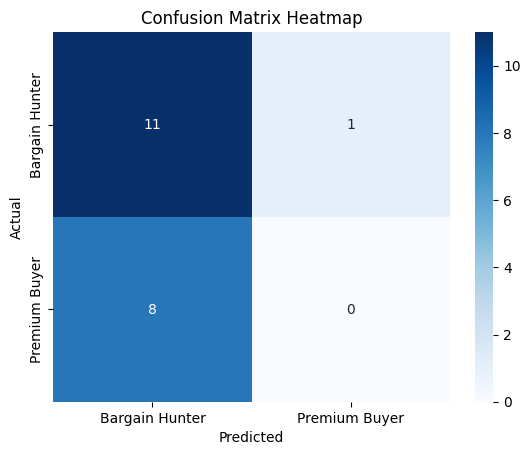

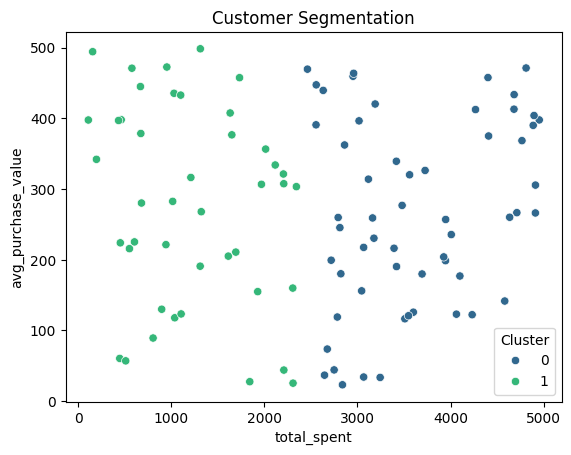

In [5]:
# Import suitable and necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/customer_behavior.csv')

# Encode target variable
data['buyer_type'] = data['buyer_type'].apply(lambda x: 1 if x == 'premium_buyer' else 0)

# Features and target variable
X = data[['total_spent', 'avg_purchase_value', 'visits_per_month']]
y = data['buyer_type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\n")

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bargain Hunter', 'Premium Buyer'], yticklabels=['Bargain Hunter', 'Premium Buyer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
print("\n")


#Segmentation and Clustering
from sklearn.cluster import KMeans

# Applying KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the data
data['Cluster'] = clusters

# Visualizing clusters
sns.scatterplot(data=data, x='total_spent', y='avg_purchase_value', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()